In [6]:
import numpy as np
import requests
from matplotlib import pyplot as plt

epochsNumber = 10000
lr = 0.01
np.random.seed(42)

In [7]:
train_url = 'https://drive.google.com/file/d/1ZJ7USoXN5Iijv_j-o8igJKD6w5jr5QPF/view?usp=sharing'
test_url = 'https://drive.google.com/file/d/1Dtf7FRjjhAGEikPFYYXmBBEdFFFWa-kK/view?usp=sharing'
train_url = 'https://drive.google.com/uc?id=' + train_url.split('/')[-2]
test_url = 'https://drive.google.com/uc?id=' + test_url.split('/')[-2]

train = requests.get(train_url).text.split("\n",1)[1]
test = requests.get(test_url).text.split("\n",1)[1]

a.


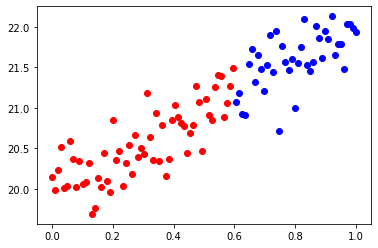

In [8]:
def convertToMatrix(text):
  counter = 0
  list = text.splitlines()
  for line in iter(list):
    counter += 1
  matrix = np.empty([counter, 2])
  for i, line in enumerate(list):
    lineList = line.split(",")
    matrix[i] = [lineList[1], lineList[2]]
  return matrix

matrixTest = convertToMatrix(test)
matrixTrain = convertToMatrix(train)

print("a.")
plt.plot(matrixTrain[:, 0], matrixTrain[:, 1], 'ro')
plt.plot(matrixTest[:, 0], matrixTest[:, 1], 'bo')

b.


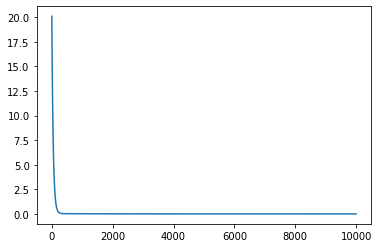

In [9]:
def linearRegression(a, b, epochs=1000):
  mseArray = []

  for epoch in range(epochs):
    yHat = a + b * xTrain
    error = yTrain - yHat
    mse = error.mean()
    mseArray.append(mse)
    da = -2 * error.mean()
    db = -2 * (xTrain * error).mean()
    a = a - lr * da
    b = b - lr * db

  return mseArray, a, b

a = np.random.randn(1)
b = np.random.randn(1)
xTrain = matrixTrain[:, 0]
yTrain = matrixTrain[:, 1]
mseArray, a, b = linearRegression(a, b, epochsNumber)

print('b.')
plt.plot(np.arange(epochsNumber),mseArray)

c. MSE:  0.04242073806392366
d.


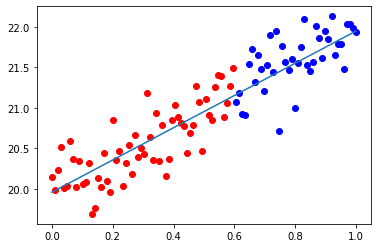

In [10]:
x = np.linspace(0, 1, 2)
y = a + b * x
yHat = a + b * matrixTest[:, 0]

plt.plot(matrixTrain[:, 0], matrixTrain[:, 1], 'ro')
plt.plot(matrixTest[:, 0], matrixTest[:, 1], 'bo')
plt.plot(x, y)

print("c. MSE: ", (matrixTest[:, 1] - yHat).mean(), end='\n')
print('d.')